In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [212]:
df=pd.read_csv('housing.csv')

In [213]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [215]:
df.isnull().values.any()

True

In [216]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [217]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

In [218]:
df['total_bedrooms']=imputer.fit_transform(df['total_bedrooms'].values.reshape(-1,1))

In [219]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

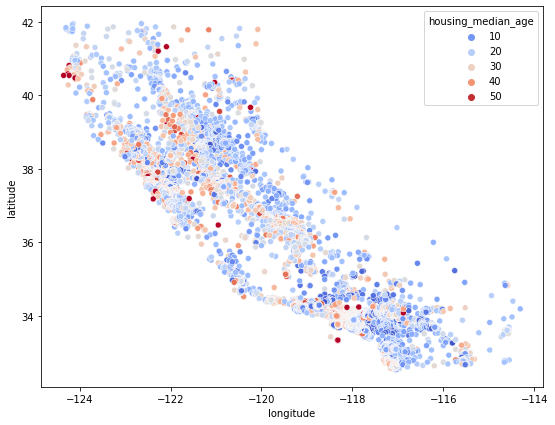

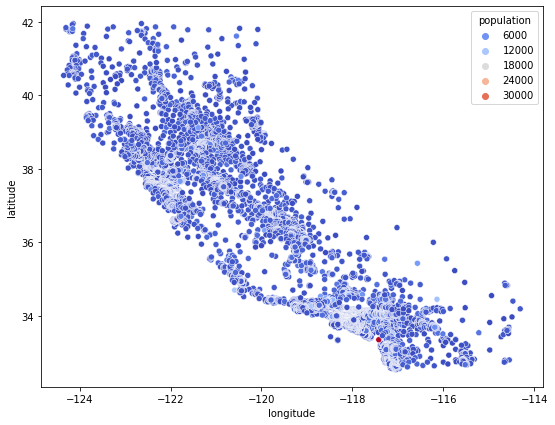

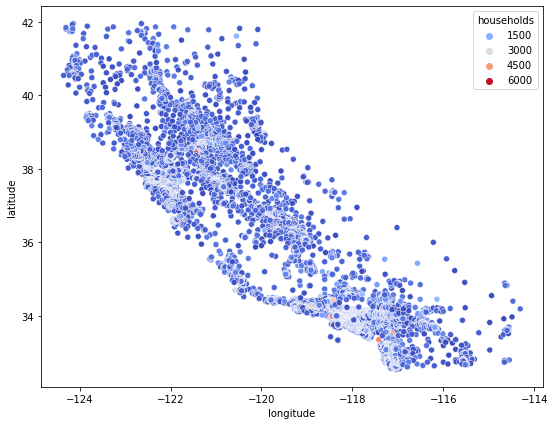

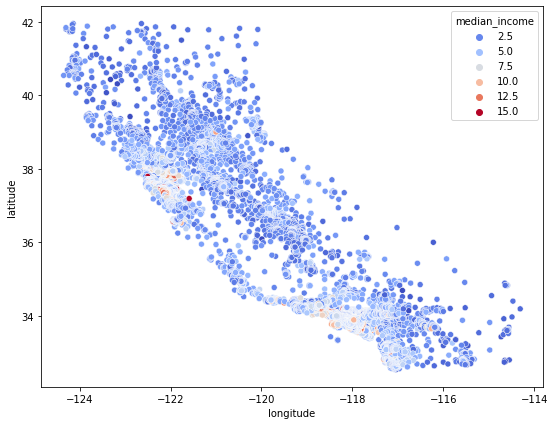

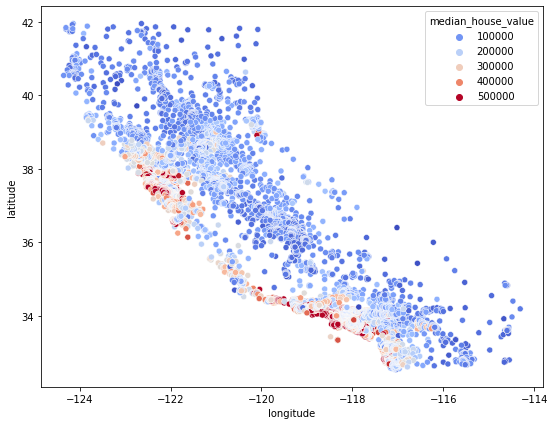

In [220]:
cols1=['housing_median_age','population','households','median_income','median_house_value']
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='longitude',y='latitude',hue=i,palette='coolwarm')
    plt.show()

In [221]:
num_cols=[]
for i in df.columns:
    if df[i].dtype!='object':
        num_cols.append(i)

In [222]:
num_cols

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

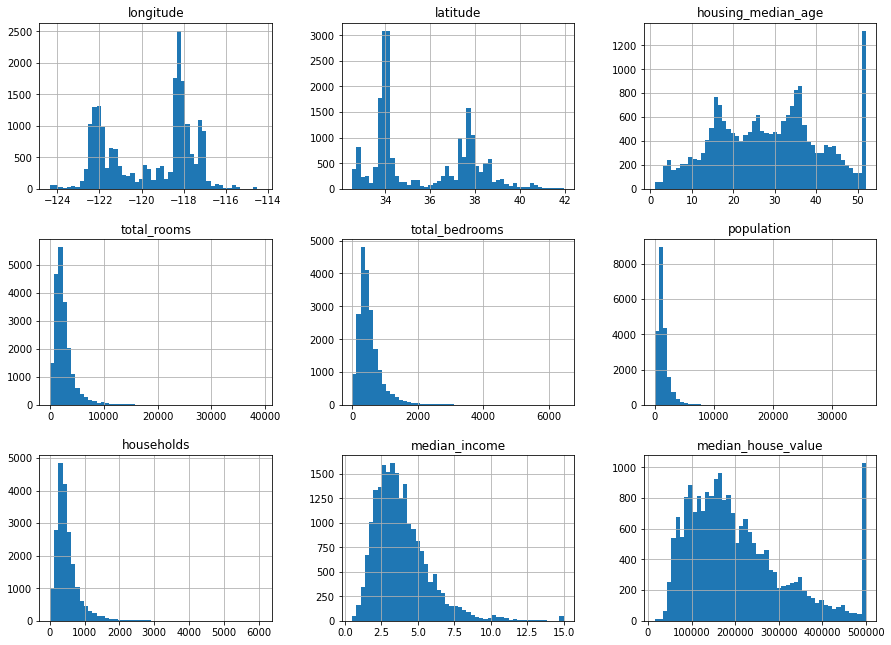

In [223]:
df[num_cols].hist(figsize=(15,11),bins=50)
plt.show()

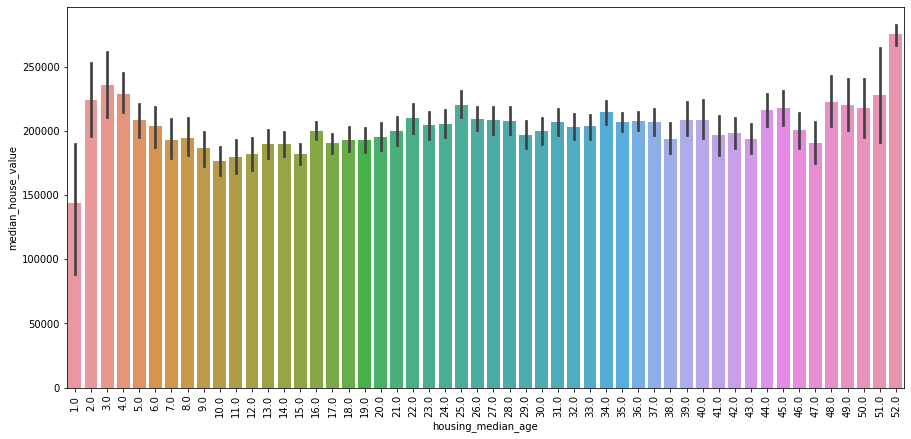

In [224]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.barplot(data=df,x='housing_median_age',y='median_house_value')
plt.show()

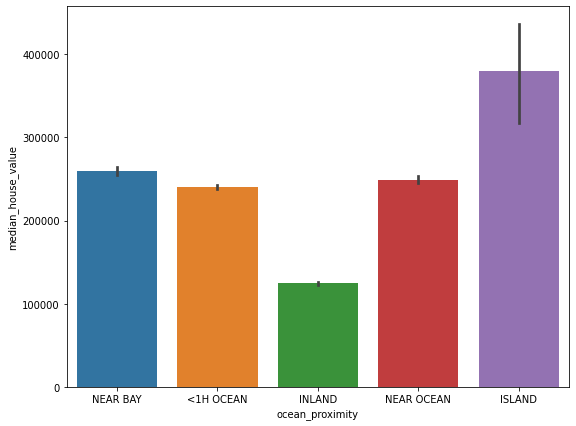

In [225]:
plt.figure(figsize=(9,7))
sns.barplot(data=df,x='ocean_proximity',y='median_house_value')
plt.show()

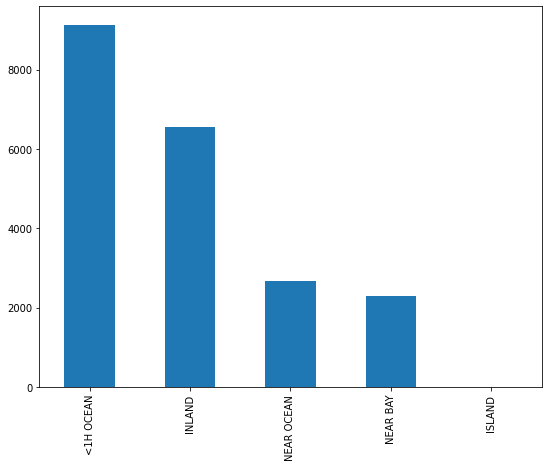

In [226]:
plt.figure(figsize=(9,7))
df['ocean_proximity'].value_counts().plot(kind='bar')
plt.show()

In [227]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [228]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [229]:
cols2=['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

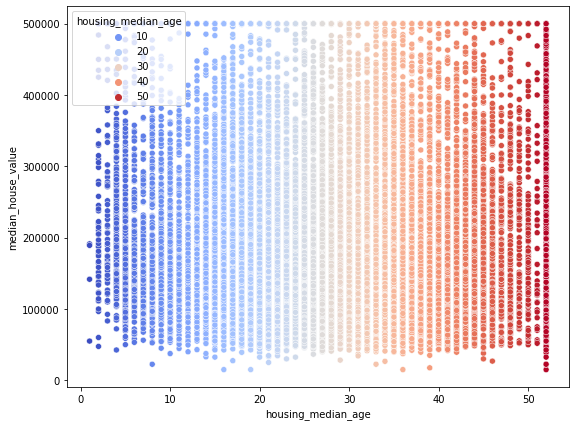

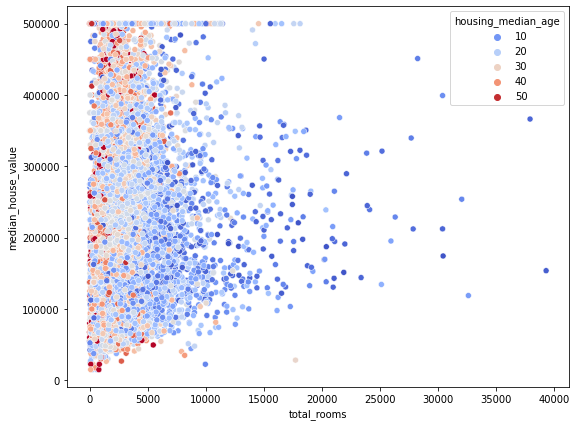

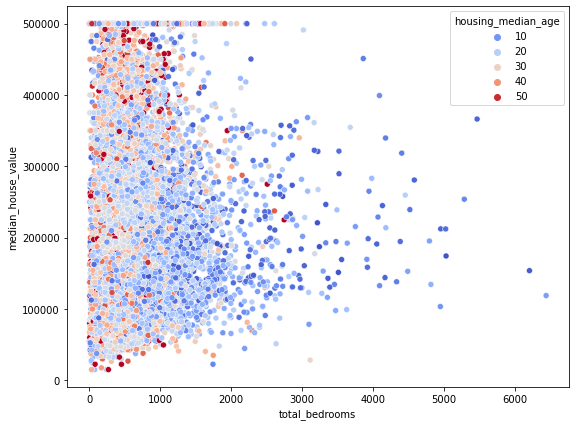

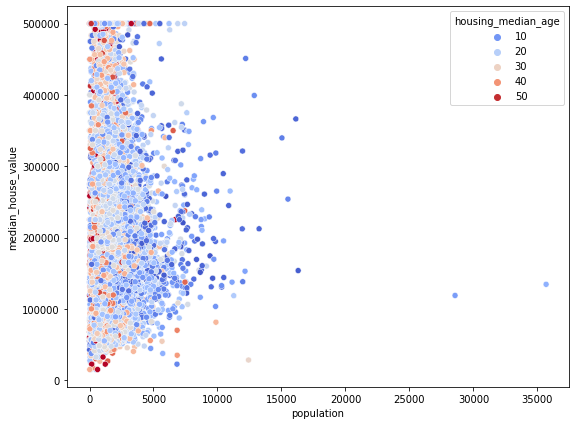

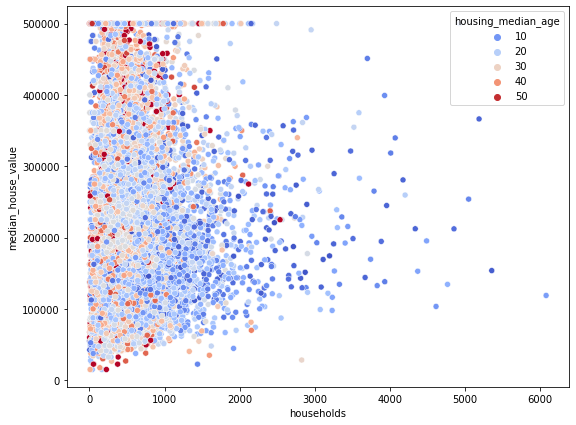

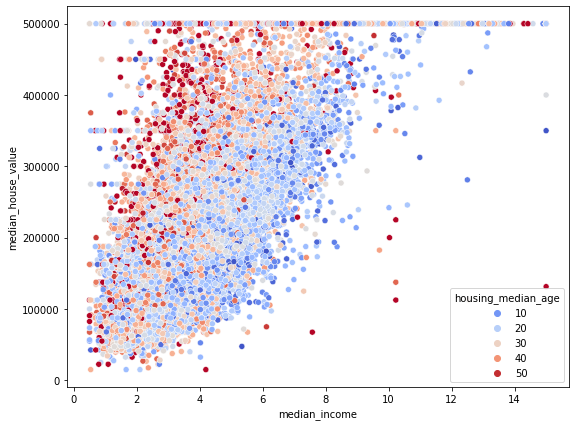

In [230]:
for i in cols2:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x=i,y='median_house_value',hue='housing_median_age',palette='coolwarm')
    plt.show()

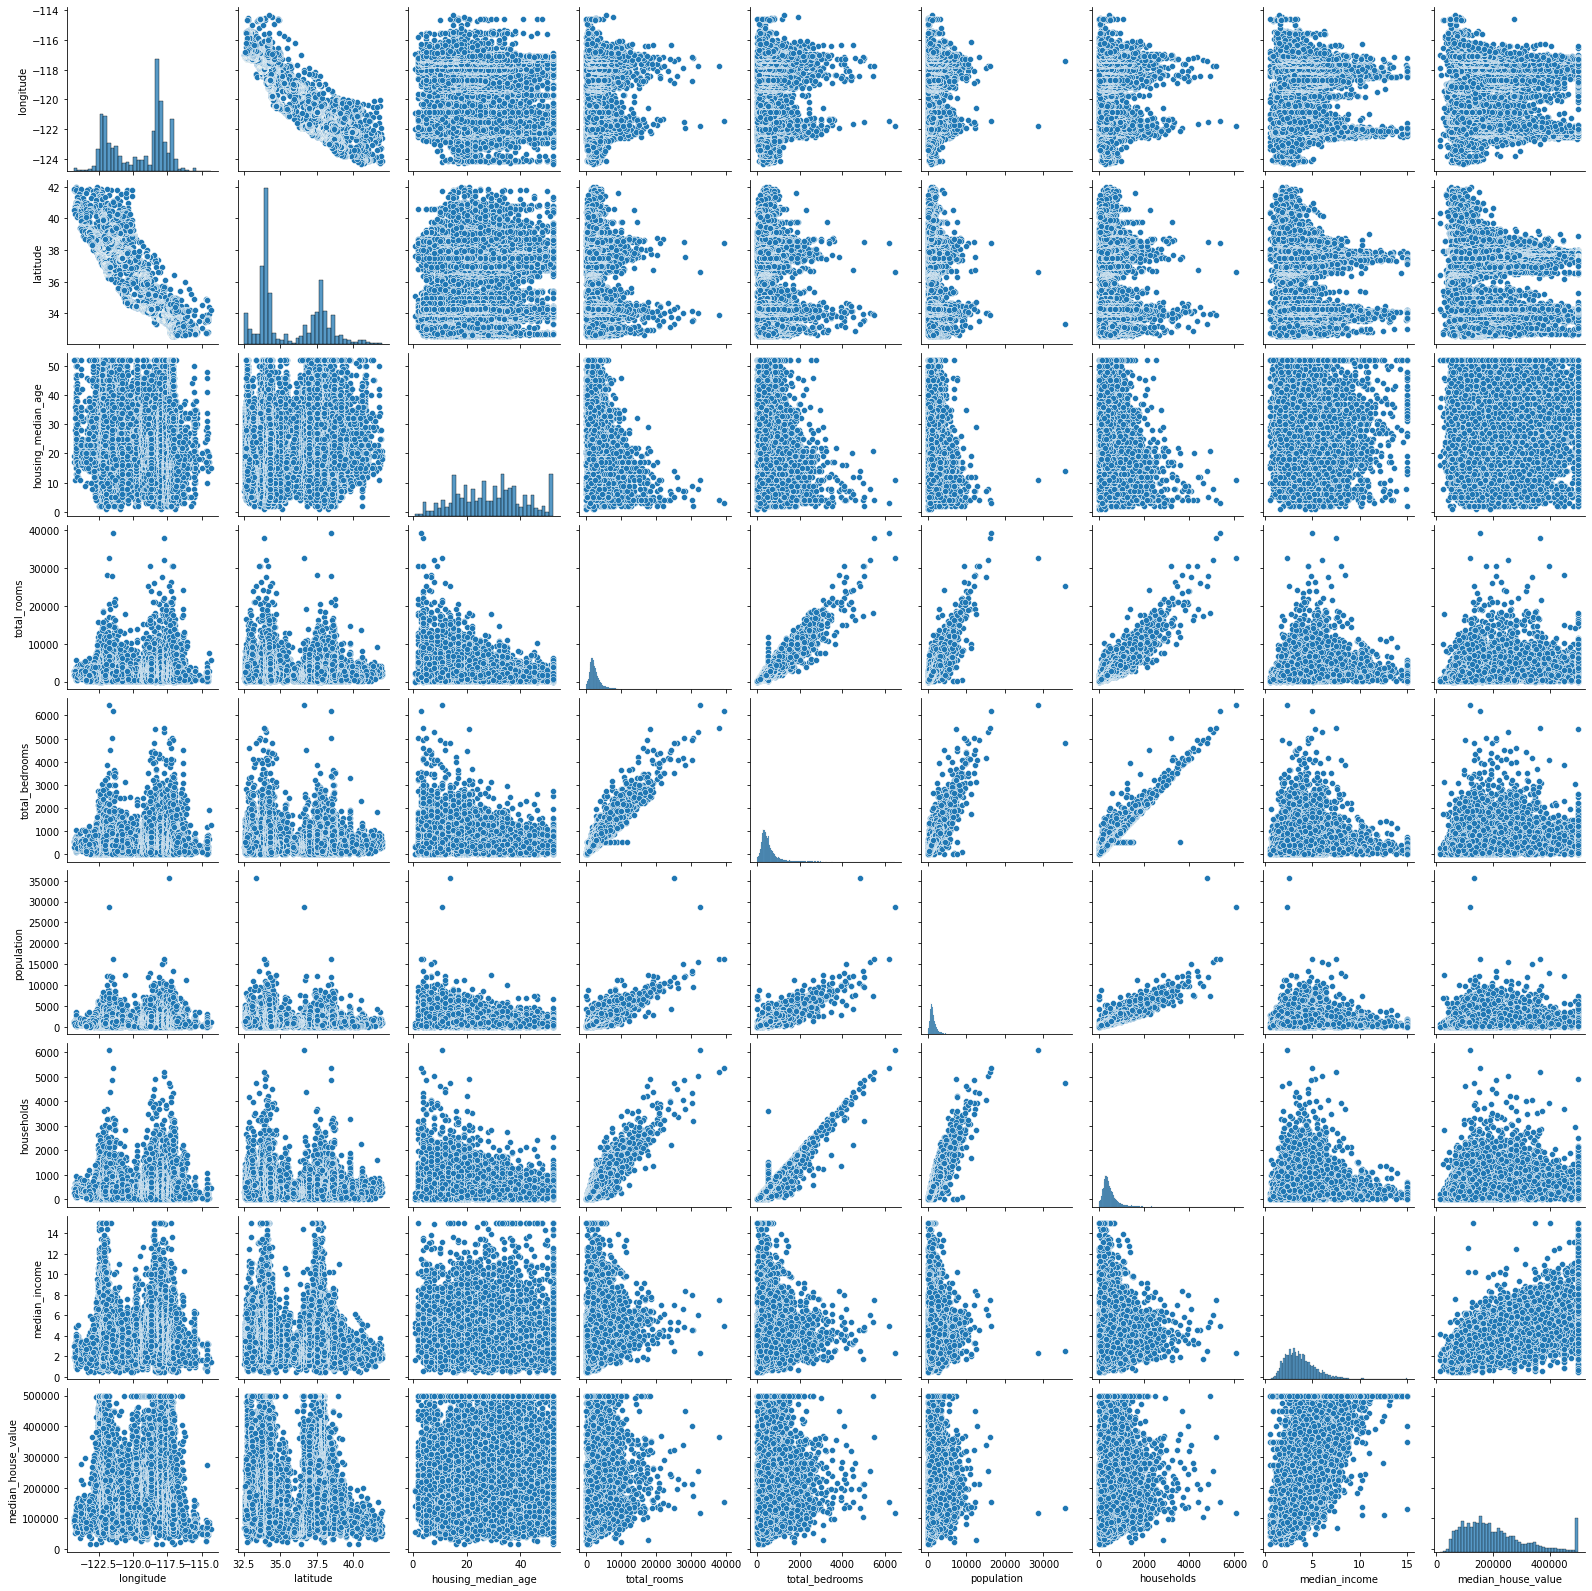

In [231]:
sns.pairplot(df)
plt.show()

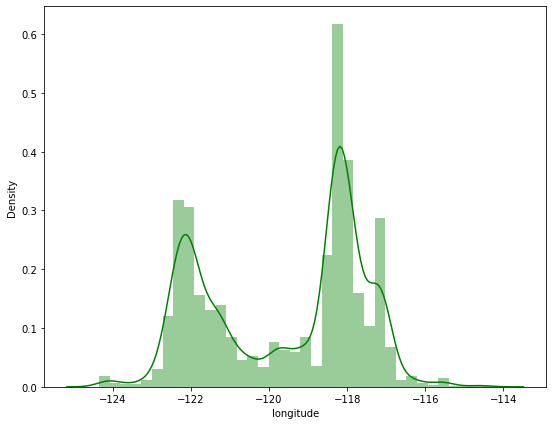

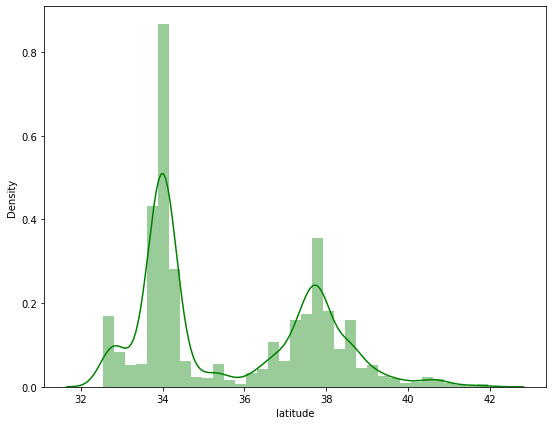

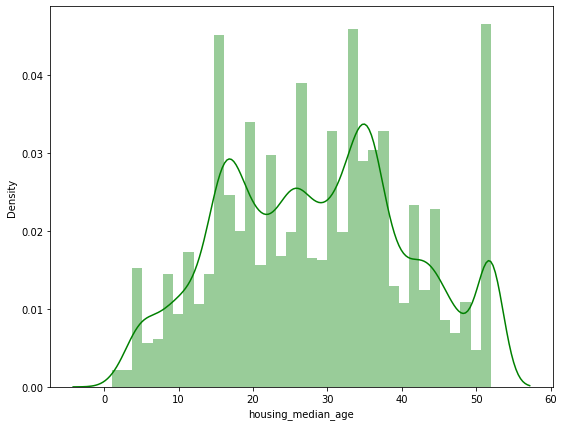

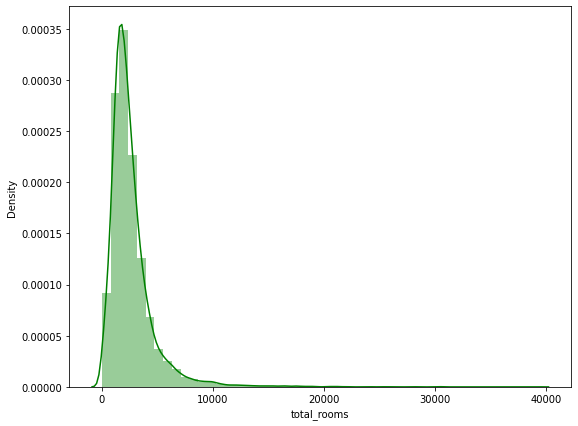

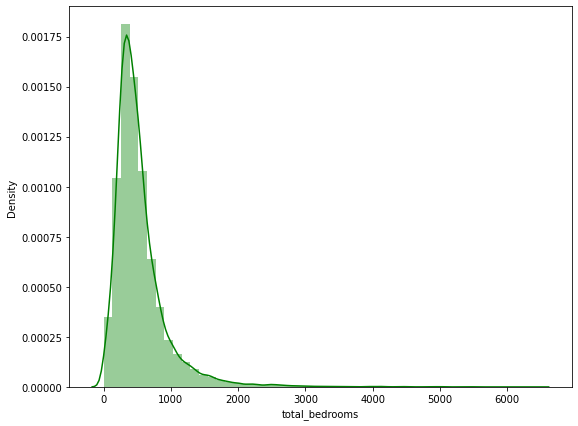

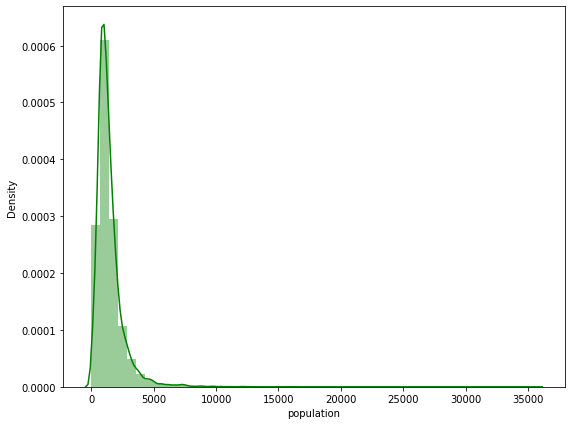

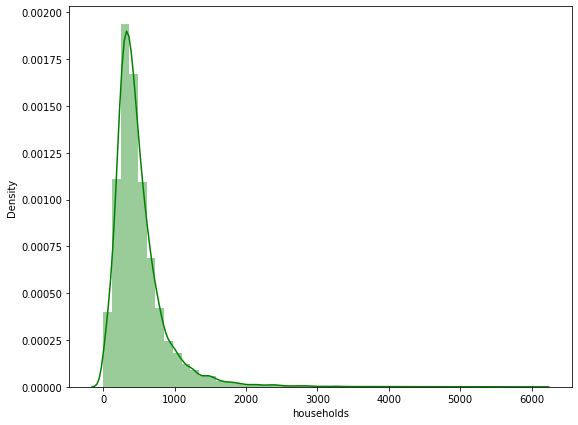

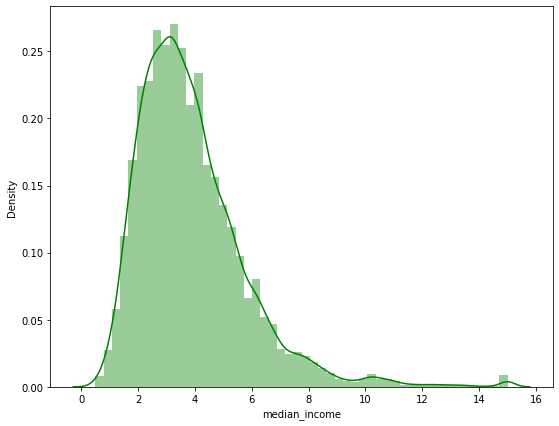

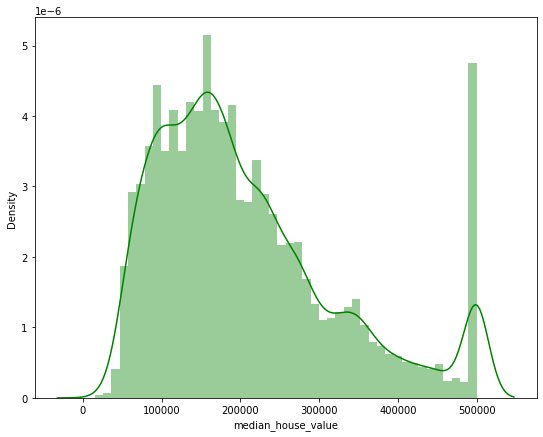

In [232]:
for i in num_cols:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],color='green')
    plt.show()

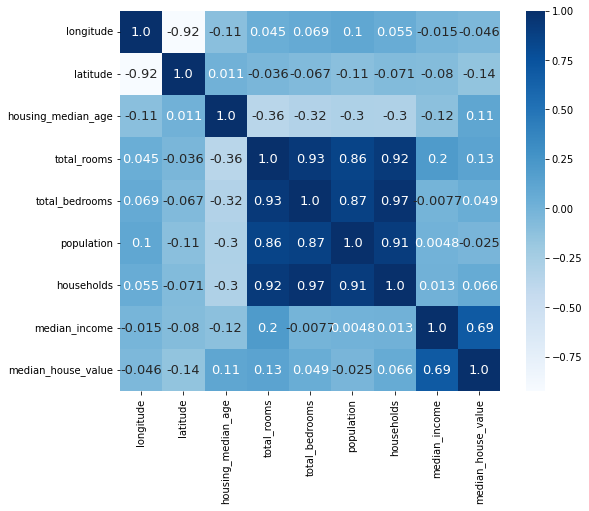

In [233]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':13},fmt='.2',cmap='Blues')
plt.show()

In [234]:
def count_outliers(data,col):
    q1=data[col].quantile(0.25,interpolation='nearest')
    q2=data[col].quantile(0.5,interpolation='nearest')
    q3=data[col].quantile(0.75,interpolation='nearest')
    q4=data[col].quantile(1,interpolation='nearest')
    IQR=q3-q1
    global LLP
    global ULP
    LLP=q1-1.5*IQR
    ULP=q3+1.5*IQR
    if data[col].min()>LLP and data[col].max()<ULP:
        print('No outliers in',i)
    else:
        print('There are outliers in',i)
        x=data[data[col]<LLP][col].size
        y=data[data[col]>ULP][col].size
        a.append(i)
        print('Count of outliers are: ',x+y)
global a
a=[]
for i in num_cols:
    count_outliers(df,i)

No outliers in longitude
No outliers in latitude
No outliers in housing_median_age
There are outliers in total_rooms
Count of outliers are:  1287
There are outliers in total_bedrooms
Count of outliers are:  1306
There are outliers in population
Count of outliers are:  1196
There are outliers in households
Count of outliers are:  1220
There are outliers in median_income
Count of outliers are:  681
There are outliers in median_house_value
Count of outliers are:  1071


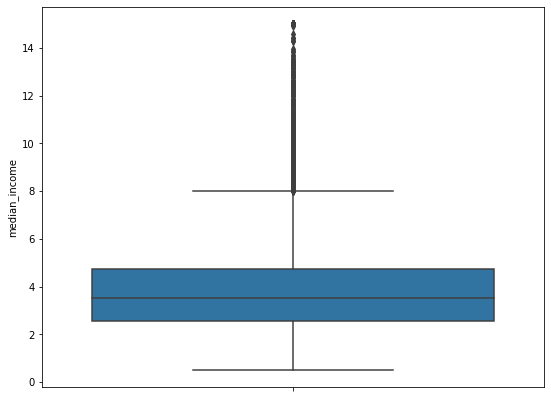

In [235]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='median_income')
plt.show()

In [236]:
df[df['median_income']>7.9].shape

(733, 10)

In [237]:
df=df[df['median_income']<7.9]

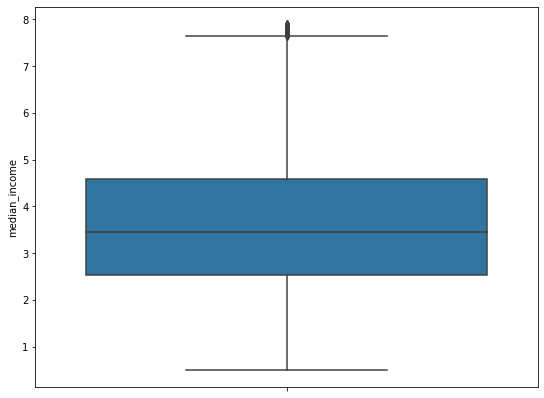

In [238]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='median_income')
plt.show()

In [239]:
df[df['median_income']>7.5].shape

(206, 10)

In [240]:
df=df[df['median_income']<7.5]

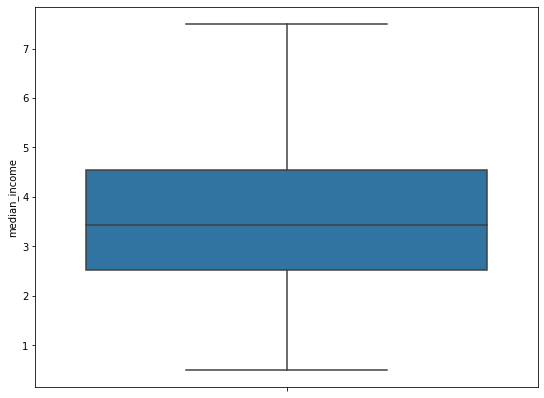

In [241]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='median_income')
plt.show()

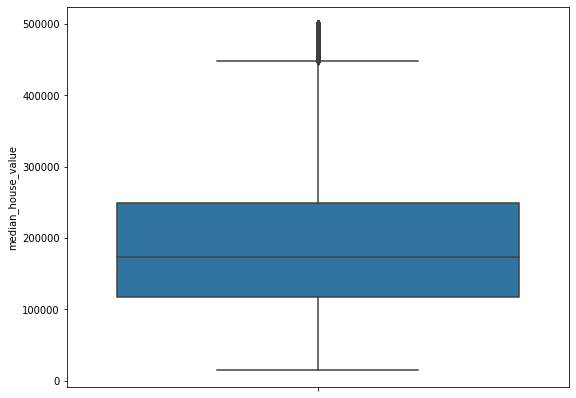

In [242]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='median_house_value')
plt.show()

In [243]:
df.shape

(19690, 10)

In [244]:
df[df['median_house_value']>430000].shape

(845, 10)

In [245]:
df=df[df['median_house_value']<430000]

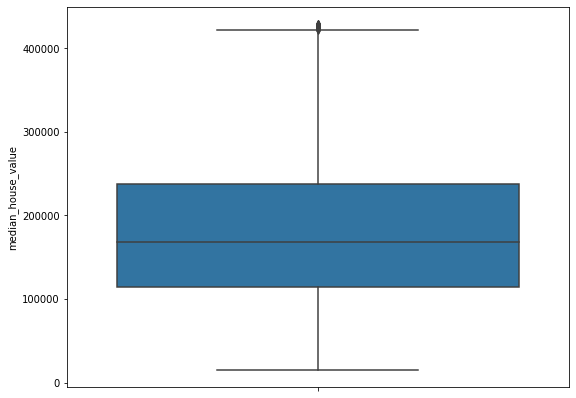

In [246]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='median_house_value')
plt.show()

In [247]:
df=df[df['median_house_value']<420000]

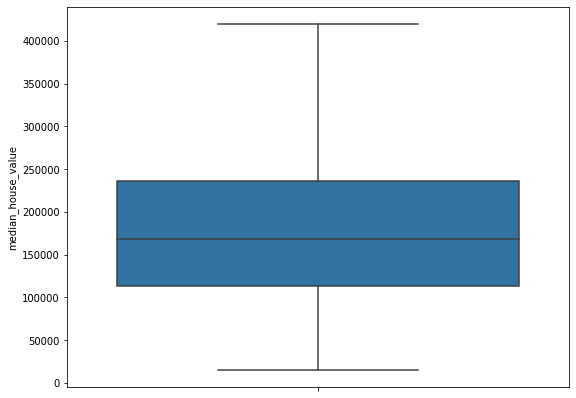

In [248]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df,y='median_house_value')
plt.show()

In [249]:
df.shape

(18783, 10)

In [250]:
scaler=StandardScaler()

In [251]:
cols3=['median_income','median_house_value']
df[cols3]=scaler.fit_transform(df[cols3])

In [252]:
df.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13960    -116.90     34.25                16.0       3018.0           523.0   
7955     -118.16     33.88                18.0       2287.0           662.0   
16244    -121.28     37.99                42.0        495.0           116.0   
12128    -117.23     33.91                 9.0      11654.0          2100.0   
12617    -121.55     38.50                 9.0       4868.0           738.0   

       population  households  median_income  median_house_value  \
13960       556.0       244.0      -0.003750            0.091837   
7955       1804.0       537.0      -1.118444           -0.135283   
16244       284.0        97.0      -0.469914           -1.476934   
12128      7596.0      2127.0       0.371920           -0.639866   
12617      2036.0       750.0       1.614349            0.266275   

      ocean_proximity  
13960          INLAND  
7955        <1H OCEAN  
16244          INLAND  
12128          INLAND  
12617          INLAND

In [253]:
def find_optimum_k(data,k_range):
    inertia,clusters=[],[]
    for i in range(1,k_range):
        kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        clusters.append(i)
        
    plt.figure(figsize=(9,7))    
    plt.plot(clusters,inertia,'o-')
    plt.title('Elbow Diagram')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

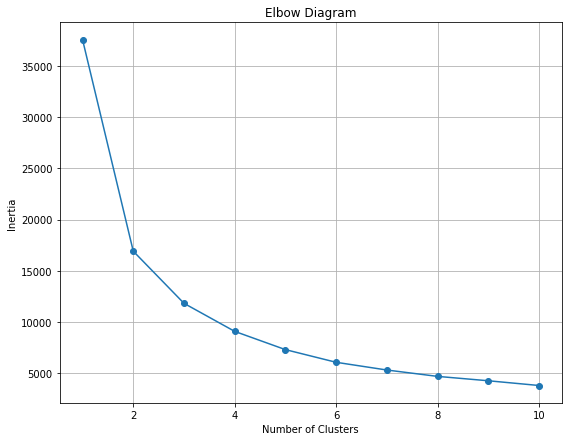

In [254]:
find_optimum_k(df[['median_income','median_house_value']],11)

In [255]:
model=KMeans(n_clusters=4,init='k-means++',n_init=10)
model.fit(df[['median_income','median_house_value']])

KMeans(n_clusters=4, n_init=10)

In [256]:
df['cluster']=model.labels_

In [257]:
df.sample(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16751    -122.46     37.71                45.0       1799.0           394.0   
12640    -121.45     38.53                34.0       1893.0           415.0   
20334    -119.01     34.23                11.0       5785.0          1035.0   
10973    -117.85     33.76                26.0       2312.0           525.0   
1964     -120.58     38.77                21.0       1661.0           406.0   

       population  households  median_income  median_house_value  \
16751      1436.0       389.0       0.084063            0.679541   
12640       884.0       395.0      -0.989767           -1.246301   
20334      2760.0       985.0       0.839751            0.589395   
10973      1273.0       437.0      -0.471798            0.267446   
1964        789.0       319.0      -0.851816           -0.856450   

      ocean_proximity  cluster  
16751      NEAR OCEAN        3  
12640          INLAND        2  
20334       <1H OCEAN        1  
10973       <1H OCEAN        3  
1964           INLAND        2

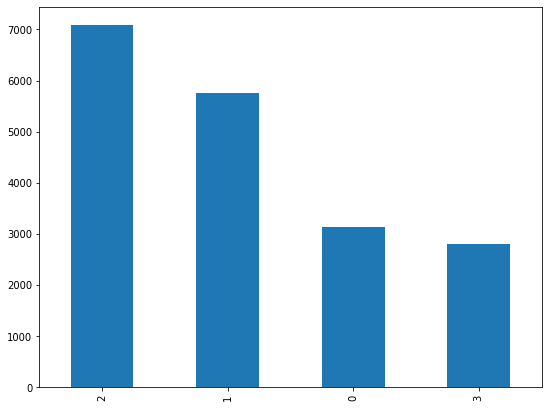

In [258]:
plt.figure(figsize=(9,7))
df['cluster'].value_counts().plot(kind='bar')
plt.show()

In [259]:
df1=df[df['cluster']==0]
df2=df[df['cluster']==1]
df3=df[df['cluster']==2]
df4=df[df['cluster']==3]

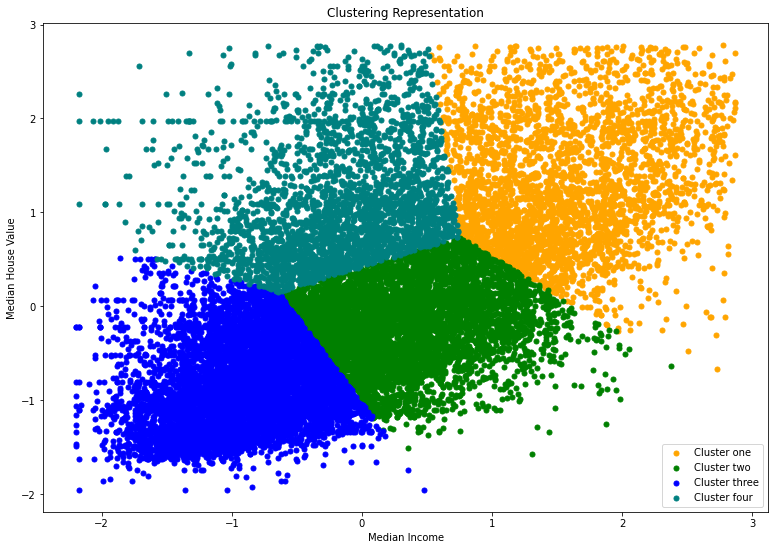

In [261]:
plt.figure(figsize=(13,9))
plt.scatter(df1['median_income'],df1['median_house_value'],s=25,color='orange',label='Cluster one')
plt.scatter(df2['median_income'],df2['median_house_value'],s=25,color='green',label='Cluster two')
plt.scatter(df3['median_income'],df3['median_house_value'],s=25,color='blue',label='Cluster three')
plt.scatter(df4['median_income'],df4['median_house_value'],s=25,color='teal',label='Cluster four')
plt.title('Clustering Representation')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.show()